# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
st=pd.read_csv("appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [3]:
apple=st

### Step 4.  Check out the type of the columns

In [5]:
res=st['Open'].nlargest(10)

In [6]:
res

448    702.41
450    700.26
451    699.88
452    699.35
449    699.16
453    689.96
446    688.26
447    686.86
457    680.45
466    679.99
Name: Open, dtype: float64

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date']=pd.to_datetime(apple['Date'])  ##### or astype('datetime64[ns]')

In [6]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 6.  Set the date as the index

In [7]:
apple.index= apple['Date']
del apple['Date']
apple.reset_index(inplace=True)


In [8]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 7.  Is there any duplicate dates?

In [9]:
import numpy as np

In [10]:
print("Dates >>> ", len(np.unique(apple['Date'])))

Dates >>>  8465


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [11]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [12]:
apple=apple.sort_values(by='Date')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


<span class="burk">### Step 9. Get the last business day of each month</span>

In [121]:
df.groupby(['year','month'])['date']

### Step 10.  What is the difference in days between the first day and the oldest

In [13]:
print(f'Differnce in days: ',(apple.Date.max()-apple.Date.min()).days)

Differnce in days:  12261


### Step 11.  How many months in the data we have?

In [14]:
df=pd.DataFrame()

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df['year'] = apple['Date'].dt.year
df['month'] = apple['Date'].dt.month
df['date'] = apple['Date'].dt.day

In [19]:
df['month'].value_counts()

3     744
8     730
10    728
6     727
5     718
12    711
1     705
4     703
7     703
11    675
9     669
2     652
Name: month, dtype: int64

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

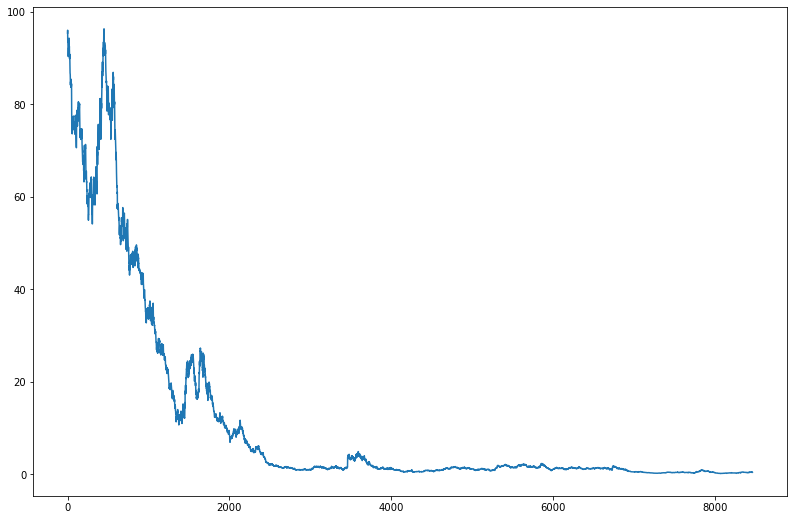

In [21]:
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])
plt.show()

### BONUS: Create your own question and answer it.

## Q1. how many stocks trading day were there in each month

In [174]:
#Q1 
year=df.groupby(['year','month'])['date'].count()
print(year.head(20))

year  month
1980  12       13
1981  1        21
      2        19
      3        22
      4        21
      5        20
      6        22
      7        22
      8        20
      9        21
      10       22
      11       20
      12       22
1982  1        20
      2        19
      3        23
      4        21
      5        20
      6        22
      7        21
Name: date, dtype: int64


## Q2. Best Day for day bullish trading.

In [23]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [24]:
apple['per_change']=((apple['High']-apple['Low'])/apple['Low'])*100

In [25]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close,per_change
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,0.417391
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,0.477064
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,0.475248
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,0.502513
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,0.450620
...,...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,1.009342
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,1.042002
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,0.965665
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2.008502


In [31]:
apple.sort_values(by='per_change', ascending=False).head()

,Date,Open,High,Low,Close,Volume,Adj Close,per_change
6734,1987-10-19,48.25,48.25,35.50,36.50,119000000,1.14,35.915493
4151,1998-01-06,15.94,20.00,14.75,18.94,453118400,0.65,35.593220
1049,2010-05-06,253.83,258.25,199.25,246.25,321465200,33.62,29.611041
6733,1987-10-20,38.50,42.00,32.63,34.50,142240000,1.08,28.715906
6729,1987-10-26,34.50,35.00,27.63,28.00,78400000,0.87,26.673905


## Q3. iphone 5 launch month stocks trend (21 September 2012)

In [40]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close,per_change
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,0.417391
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,0.477064
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,0.475248
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,0.502513
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,0.450620
...,...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,1.009342
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,1.042002
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,0.965665
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2.008502


In [41]:
apple['year'] = apple['Date'].dt.year
apple['month'] = apple['Date'].dt.month
apple['day'] = apple['Date'].dt.day

In [43]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close,per_change,year,month,day
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,0.417391,1980,12,12
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,0.477064,1980,12,15
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,0.475248,1980,12,16
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,0.502513,1980,12,17
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,0.450620,1980,12,18


In [51]:
apple.loc[(apple['year']==2012) & (apple['month']==9)][['day','Low','High','per_change']]

,day,Low,High,per_change
461,4,664.50,675.14,1.601204
460,5,669.60,676.35,1.008065
459,6,670.80,678.29,1.116577
458,7,675.77,682.48,0.992941
457,10,662.10,683.29,3.200423
456,11,656.50,670.10,2.071592
455,12,656.00,669.90,2.118902
454,13,674.77,685.50,1.590171
453,14,687.89,696.98,1.321432
452,17,694.61,699.80,0.747182
